In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder    

In [2]:
data=pd.read_csv("Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [17]:
data.shape

(600, 6)

In [4]:
data["Taxable_Income"]=1

In [5]:
l=[]
for i in data["Taxable.Income"]:
    if i<=30000:
        l.append("Risky")
    else:
        l.append("Good")
        
data["Taxable_Income"]=l 

In [6]:
data.sample(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
142,NO,Single,59419,122654,26,YES,Good
477,YES,Divorced,57402,158849,29,NO,Good
247,YES,Divorced,11865,108245,1,NO,Risky
433,NO,Married,15532,129265,14,YES,Risky
240,NO,Single,32603,139146,30,YES,Good
460,NO,Divorced,58199,54701,10,YES,Good
134,YES,Married,35832,190365,28,NO,Good
523,NO,Divorced,50286,42198,12,NO,Good
98,YES,Married,22187,77053,18,YES,Risky
315,YES,Divorced,23075,176278,19,NO,Risky


In [7]:
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [9]:
label_encoder=LabelEncoder()
data["Undergrad"]=label_encoder.fit_transform(data["Undergrad"])
data["Marital.Status"]=label_encoder.fit_transform(data["Marital.Status"])
data["Urban"]=label_encoder.fit_transform(data["Urban"])
data["Taxable_Income"]=label_encoder.fit_transform(data["Taxable_Income"])

In [10]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


<AxesSubplot:xlabel='Undergrad', ylabel='Taxable_Income'>

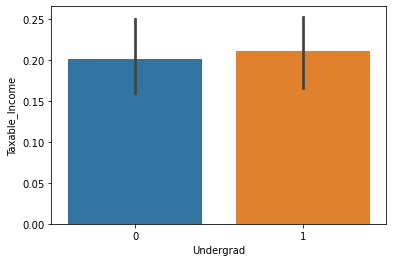

In [11]:
sns.barplot(data["Undergrad"],data["Taxable_Income"])

<AxesSubplot:xlabel='City.Population', ylabel='Taxable_Income'>

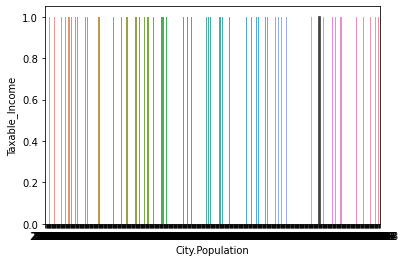

In [12]:
sns.barplot(data["City.Population"],data["Taxable_Income"])

In [13]:
data.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
Taxable_Income,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


<AxesSubplot:>

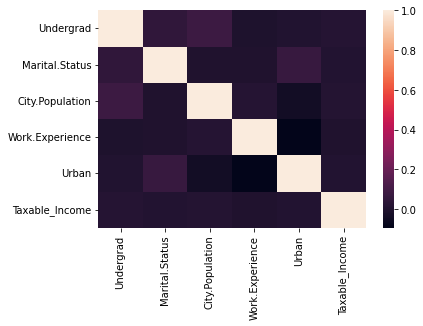

In [14]:
sns.heatmap(data.corr())

In [15]:
array=data.values

In [16]:
X=array[:,0:5]
Y=array[:,-1]

In [31]:
num_trees=100
max_features=5
kfold=KFold(n_splits=10,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,max_features=max_features,random_state=0)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7416666666666666


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [21]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [22]:
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7933333333333332


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
num_trees=range(1,50)
k_scores=[]

In [24]:
for k in num_trees:
    rf=RandomForestClassifier(n_estimators=k)
    scores=cross_val_score(rf,X,Y,cv=10)
    k_scores.append(scores.mean())

([<matplotlib.axis.XTick at 0x10b230b9fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

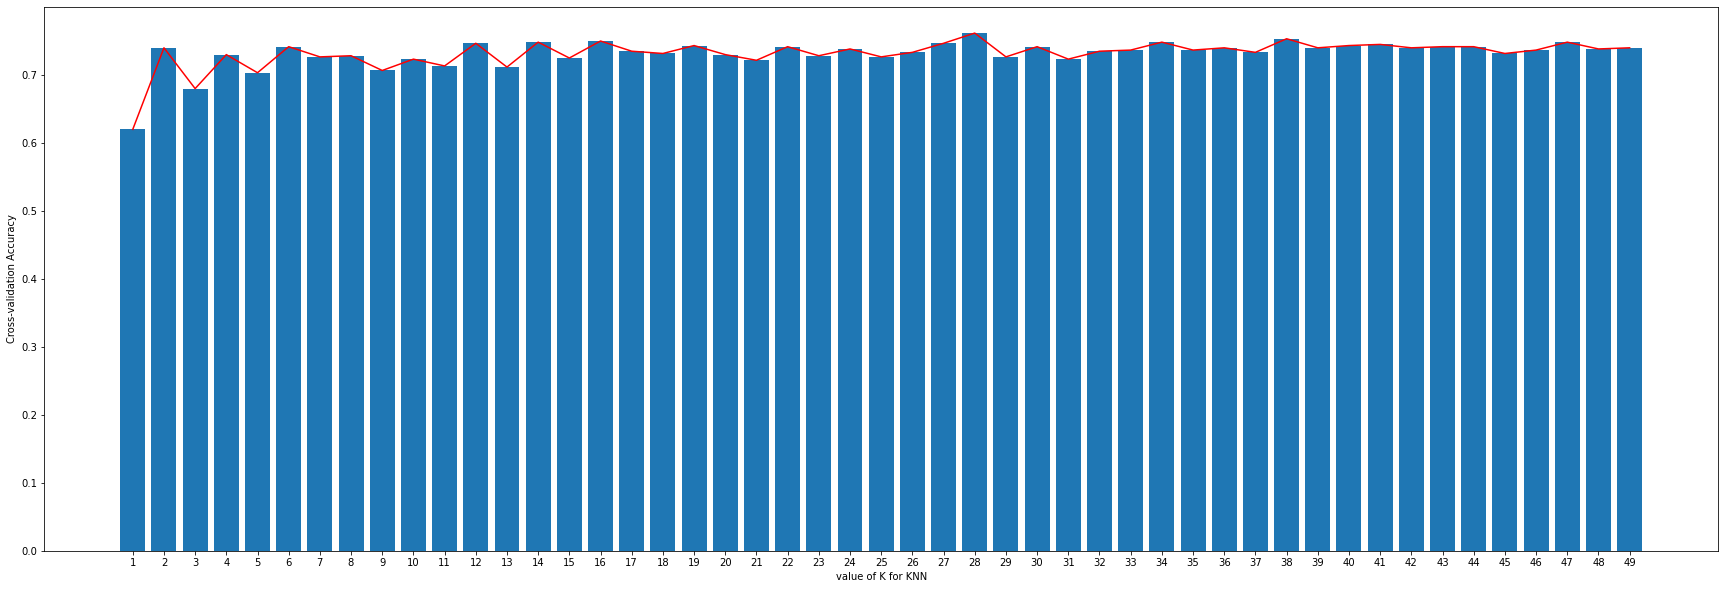

In [27]:
plt.figure(figsize=(30,10))
plt.bar(num_trees,k_scores)
plt.plot(num_trees,k_scores,color="red")

plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validation Accuracy')
plt.xticks(num_trees)

In [28]:
k_scores

[0.62,
 0.74,
 0.6799999999999999,
 0.7300000000000001,
 0.7033333333333333,
 0.7416666666666667,
 0.7266666666666668,
 0.7283333333333333,
 0.7066666666666668,
 0.7233333333333334,
 0.7133333333333333,
 0.7466666666666668,
 0.7116666666666667,
 0.7483333333333333,
 0.725,
 0.75,
 0.7350000000000001,
 0.7316666666666667,
 0.7433333333333334,
 0.7300000000000001,
 0.7216666666666667,
 0.7416666666666667,
 0.7283333333333333,
 0.7383333333333334,
 0.7266666666666668,
 0.7333333333333333,
 0.7466666666666667,
 0.7616666666666666,
 0.7266666666666667,
 0.7416666666666667,
 0.7233333333333334,
 0.7350000000000001,
 0.7366666666666666,
 0.7483333333333333,
 0.7366666666666666,
 0.74,
 0.7333333333333334,
 0.7533333333333333,
 0.74,
 0.7433333333333334,
 0.745,
 0.74,
 0.7416666666666667,
 0.7416666666666667,
 0.7316666666666667,
 0.7366666666666666,
 0.7483333333333333,
 0.7383333333333334,
 0.74]